a = 18.259583180109487
b = 11.421037532814646
When x= 10, the predicted value of y= 132.47


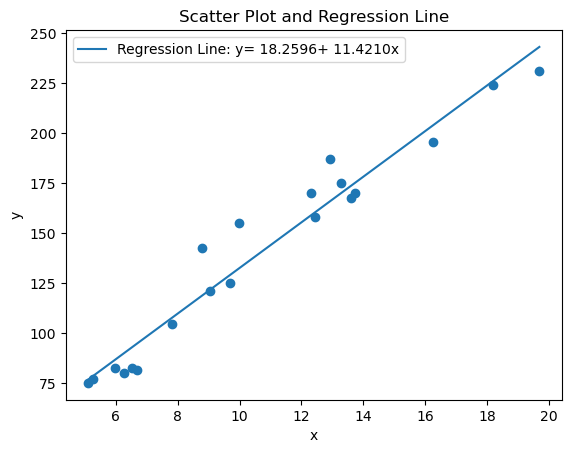

a = 18.259583180109622
b = 11.421037532814635
When x=10 y=132.46995850825598


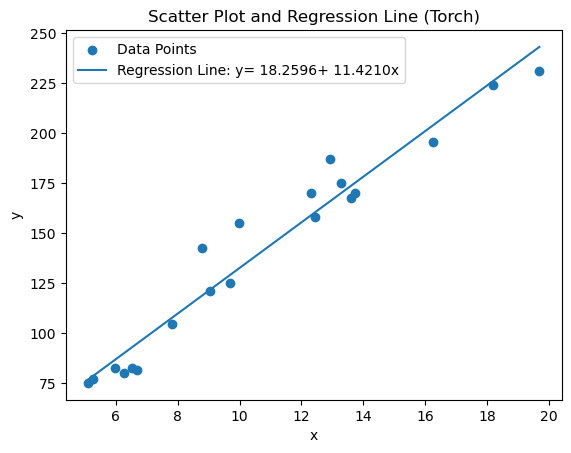

In [67]:
#1. APPROACH USING NUMPY: 
import numpy as np
import pandas as pd


#part a: calculating a and b of the linear regression and predicting y for x=10
df = pd.read_csv('dataset.csv')
x1 = df['x'].values
y1 = df['y'].values

x_mean = np.mean(x1)
y_mean = np.mean(y1)

#calculating a and b using the least squares formulas
b = np.sum((x1 - x_mean) * (y1 - y_mean))/ np.sum((x1 - x_mean)** 2)
a = y_mean - (b * x_mean)

# Predicted value of y when x=10
y_pred = a + (b*10)

print(f"a = {a}")
print(f"b = {b}")
print(f"When x= 10, the predicted value of y= {y_pred:.2f}")


#part b: plotting the regression line: 
import matplotlib.pyplot as plt

plt.scatter(x1, y1)

plt.plot(x1, a + b * x1, label=f'Regression Line: y= {a:.4f}+ {b:.4f}x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Scatter Plot and Regression Line')

plt.show()

#2. APPROACH USING TORCH: 
import torch
import pandas as pd

filepath = 'dataset.csv'
df = pd.read_csv(filepath)

x = torch.tensor(df['x'].values).unsqueeze(1)
y = torch.tensor(df['y'].values).unsqueeze(1)


x = torch.cat((torch.ones(x.shape[0], 1), x), dim=1)


#normal equation to solve the linear regression
w = torch.linalg.solve(x.T @ x , x.T @ y)

#PART A: SHOWING THE INTERCEPT AND THE SLOPE
print(f"a = {w[0].item()}")
print(f"b = {w[1].item()}")

#when x=10 then we predict y to be: 
yten= w[0].item()+   w[1].item()*(10)

print(f"When x=10 y={yten}")


import matplotlib
import matplotlib.pyplot as plt

# Plotting the scatter plot and regression line
# Converting x and y back to NumPy for plotting
x_np = df['x'].values
y_np = df['y'].values

plt.scatter(x_np, y_np, label='Data Points')

# Plotting the regression line using the Torch-derived coefficients
plt.plot(x_np, w[0].item() + w[1].item() * x_np, label=f'Regression Line: y= {w[0].item():.4f}+ {w[1].item():.4f}x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Scatter Plot and Regression Line (Torch)')

plt.show()
